梯度下降解最小二乘

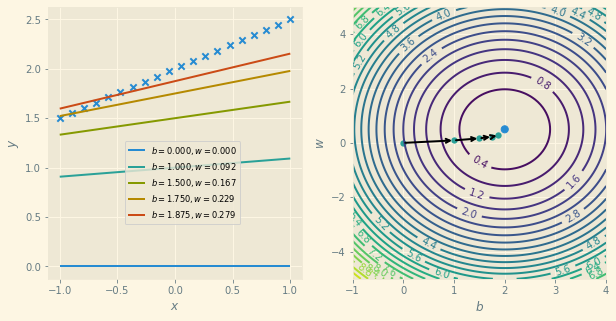

In [1]:
import matplotlib.pyplot as plt
import numpy as np

m = 20
b_true, w_true = 2, 0.5
x = np.linspace(-1, 1, m)
y = b_true + w_true * x


def cost_func(b, w):
    b = np.atleast_3d(np.asarray(b))
    w = np.atleast_3d(np.asarray(w))
    return np.average((y-hypothesis(x, b, w))**2, axis=2)/2


def hypothesis(x, b, w):
    return b + w * x


with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].scatter(x, y, marker='x', s=40)

    # First construct a grid of (b, w) parameter pairs and their corresponding cost function values.
    b_grid = np.linspace(-1, 4, 101)
    w_grid = np.linspace(-5, 5, 101)
    J_grid = cost_func(b_grid[np.newaxis, :, np.newaxis],
                       w_grid[:, np.newaxis, np.newaxis])

    # A labeled contour plot for the RHS cost function
    X, Y = np.meshgrid(b_grid, w_grid)
    contours = ax[1].contour(X, Y, J_grid, 30)
    ax[1].clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    ax[1].scatter([b_true]*2, [w_true]*2, s=[50, 10])

    # Take N steps with learning rate alpha down the steepest gradient, starting at (b, w) = (0, 0).
    N = 5
    alpha = 0.5
    theta = [np.array((0, 0))]
    J = [cost_func(*theta[0])[0]]
    for j in range(N-1):
        last_theta = theta[-1]
        this_theta = np.empty((2,))
        this_theta[0] = last_theta[0] - alpha / m * np.sum((hypothesis(x, *last_theta) - y))
        this_theta[1] = last_theta[1] - alpha / m * np.sum((hypothesis(x, *last_theta) - y) * x)
        theta.append(this_theta)
        J.append(cost_func(*this_theta))

    # Annotate the cost function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    # Also plot the fit function on the LHS data plot in a matching colour.
    # colors = ['#dc322f', '#859900', '#268bd2', '#d33682', '#cb4b16']
    ax[0].plot(x, hypothesis(x, *theta[0]), lw=2, label=r'$b = {:.3f}, w = {:.3f}$'.format(*theta[0]))
    for j in range(1, N):
        ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                       arrowprops={'arrowstyle': '->', 'lw': 2},
                       va='center', ha='center')
        ax[0].plot(x, hypothesis(x, *theta[j]), lw=2,
                   label=r'$b = {:.3f}, w = {:.3f}$'.format(*theta[j]))
    ax[1].scatter(*zip(*theta), s=40, lw=0)

    # Labels, titles and a legend.
    ax[1].set_xlabel(r'$b$')
    ax[1].set_ylabel(r'$w$')
    # ax[1].set_title('Cost function')
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$y$')
    # ax[0].set_title('Data and fit')
    axbox = ax[0].get_position()
    # Position the legend by hand so that it doesn't cover up any of the lines.
    ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height), fontsize='small')

plt.savefig('gradient-descent.svg', transparent=True)
plt.show()
